# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import neighbors
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Pre-Processing for modeling

In [2]:
#import df
train_dum_df = pd.read_csv('./Data/train_dum_df.csv', index_col=0)
test_dum_df = pd.read_csv('./Data/test_dum_df.csv', index_col=0)

In [3]:
#assign predictor and target variables
y = train_dum_df['SalePrice'].apply(np.log)
X = train_dum_df.drop(["SalePrice"], axis = 1)

In [4]:
#train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##    Multiple Linear Regression

In [5]:
ols = LinearRegression()

ols.fit(X_train, y_train)
cv = np.mean(cross_val_score(ols, X_train, y_train, cv = 10))
pred = ols.predict(X_test)
RMSE = (mean_squared_error(pred, y_test, squared = False))


print("R^2 train set: %f" %ols.score(X_train, y_train))
print("R^2 test  set: %f" %ols.score(X_test, y_test))
print("CV R^2 train set: " + str(round(cv,5)))
print("RMSE: " + str(round(RMSE, 5))) 

R^2 train set: 0.910181
R^2 test  set: 0.882335
CV R^2 train set: 0.84205
RMSE: 0.14128


Text(0, 0.5, 'Predicted Value')

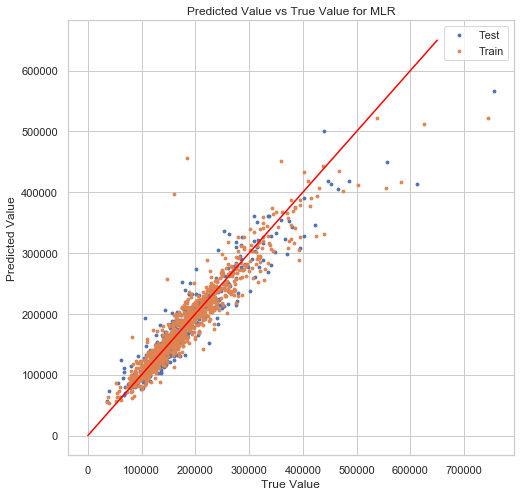

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x = np.exp(y_test), y = np.exp(pred), s = 8, label = "Test")
plt.scatter(x = np.exp(y_train), y = np.exp(ols.predict(X_train)), s = 8, label = "Train")
plt.plot([0,650000],[0,650000], color = "red")
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for MLR")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [7]:
# calculate VIF for each feature 
VIF = pd.DataFrame() 
VIF["Features"] = X.columns 
VIF["VIF"] = [round(variance_inflation_factor(X.values, i),3)
                          for i in range(len(X.columns))] 
  
VIF.sort_values(by='VIF', ascending=False)

,Features,VIF
79,Exterior1st_CBlock,inf
9,MSSubClass_90,inf
61,BldgType_Duplex,inf
93,Exterior2nd_CBlock,inf
118,GarageType_NA,inf
121,GarageCond_None,inf
123,GarageCond_TA,484.687
152,GarageQual,236.568
16,MSZoning_RL,190.387
113,GarageType_Attchd,163.565


In [8]:
#observe features with p-values less than 0.05 
features_add=sm.add_constant(X)
ols = sm.OLS(y, features_add).fit().summary2()
ols2 = ols.tables[1][ols.tables[1]['P>|t|'] < 0.05].round(4)[1:]

ols2.reindex(ols2["Coef."].abs().sort_values(ascending = False).index)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
MSZoning_RH,0.4867,0.0636,7.6523,0.0000,0.3619,0.6115
MSZoning_FV,0.4707,0.0643,7.3168,0.0000,0.3445,0.5969
MSZoning_RL,0.4423,0.0538,8.2269,0.0000,0.3368,0.5478
MSZoning_RM,0.4139,0.0502,8.2371,0.0000,0.3153,0.5125
Exterior1st_BrkComm,-0.3531,0.1460,-2.4183,0.0157,-0.6395,-0.0666
GarageType_NA,0.2164,0.0752,2.8771,0.0041,0.0688,0.3640
GarageCond_None,0.2164,0.0752,2.8771,0.0041,0.0688,0.3640
Neighborhood_StoneBr,0.1748,0.0446,3.9170,0.0001,0.0872,0.2623
GarageType_Basment,0.1681,0.0667,2.5202,0.0118,0.0372,0.2989
GarageType_Attchd,0.1530,0.0570,2.6847,0.0074,0.0412,0.2649


## Ridge Model

In [9]:
ridge = Ridge(normalize = True) 

In [10]:
alpha_100 = np.logspace(-5,5, 100)
coef = []
for i in alpha_100:                                                                      
    ridge.set_params(alpha = i)
    ridge.fit(X, y)
    coef.append(ridge.coef_)

Text(0, 0.5, 'coefficients')

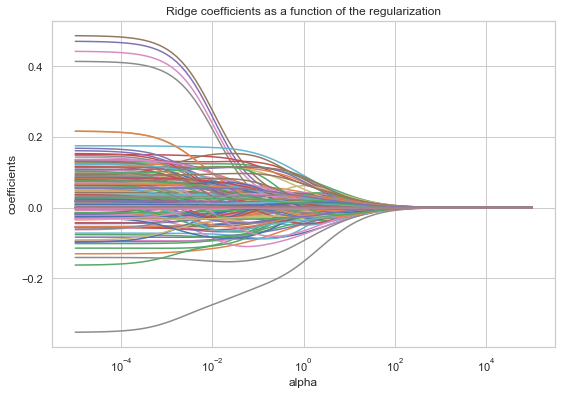

In [11]:
df_coef = pd.DataFrame(coef, index=alpha_100)
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx = True, title=title, legend = False)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')


In [12]:
ridgecv = RidgeCV(alphas = alpha_100, normalize = True, cv = 10)

In [13]:
ridgecv.fit(X_train, y_train)
alpha_ridge = ridgecv.alpha_

y_train_predicted = ridgecv.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))

y_test_predicted = ridgecv.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

print("Best Lambda: " + str(alpha_ridge))
print("R^2 train set: %f" %ridgecv.score(X_train, y_train))
print("R^2 test set: %f" %ridgecv.score(X_test, y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

Best Lambda: 0.22051307399030456
R^2 train set: 0.898902
R^2 test set: 0.872538
RMSE for train data is: 0.125
RMSE for test data is: 0.147


In [14]:
ridgecv_coef = pd.DataFrame(ridgecv.coef_, index = X.columns).rename(columns = {0:"Coef."})
ridgecv_coef = ridgecv_coef.reindex(ridgecv_coef["Coef."].abs().sort_values(ascending = False).index)
ridgecv_coef.head(10)

,Coef.
Exterior1st_BrkComm,-0.190006
SaleType_Oth,0.186473
SaleCondition_Alloca,0.184389
GarageCond_Po,0.149035
Neighborhood_StoneBr,0.145612
Neighborhood_MeadowV,-0.136295
Exterior1st_Stone,0.127123
Neighborhood_Veenker,0.119474
SaleType_CWD,0.117920
MSSubClass_40,0.116040


## Lasso Model

In [15]:
lasso = Lasso(normalize = True, max_iter = 10000)

In [16]:
alpha_100 = np.logspace(-7,-1, 100)
coef = []
for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(X, y)
    coef.append(lasso.coef_)

Text(0, 0.5, 'coefficients')

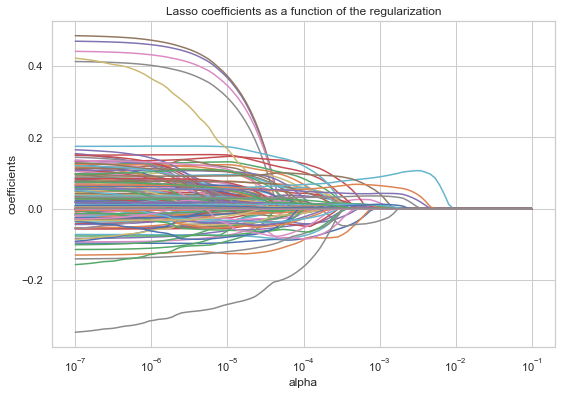

In [17]:
df_coef = pd.DataFrame(coef, index=alpha_100)
title = 'Lasso coefficients as a function of the regularization'
axes = df_coef.plot(logx = True, title=title, legend = False)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')

In [18]:
lassocv = LassoCV(alphas = alpha_100, normalize = True, cv = 10, max_iter = 10000)

In [19]:
lassocv.fit(X_train, y_train)
alpha_lasso = lassocv.alpha_

y_train_predicted = lassocv.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))

y_test_predicted = lassocv.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

print("Best Lambda: " + str(alpha_lasso))
print("R^2 train set: %f" %lassocv.score(X_train, y_train))
print("R^2 test set: %f" %lassocv.score(X_test, y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)


Best Lambda: 0.00014174741629268049
R^2 train set: 0.892270
R^2 test set: 0.881130
RMSE for train data is: 0.129
RMSE for test data is: 0.142


In [20]:
lassocv_coef = pd.DataFrame(lassocv.coef_, index = X.columns).rename(columns = {0:"Coef."})
lassocv_imp = lassocv_coef[lassocv_coef["Coef."] > 0]
lassocv_imp = lassocv_coef.reindex(lassocv_coef["Coef."].abs().sort_values(ascending = False).index)
lassocv_imp.head(10)

,Coef.
Exterior1st_BrkComm,-0.187989
Neighborhood_StoneBr,0.125988
Neighborhood_Crawfor,0.117401
MSSubClass_30,-0.106239
CentralAir,0.098440
Neighborhood_NridgHt,0.092029
GarageCond_Po,0.088922
Neighborhood_NoRidge,0.085297
Exterior1st_BrkFace,0.084642
LotShape_IR3,-0.080876


### Feature Selection and refitting MLR 


In [21]:
imp_cols = lassocv_coef[lassocv_coef["Coef."] != 0].index.tolist()
print("Shape of Data set with only important features: " + str(X[imp_cols].shape))

Shape of Data set with only important features: (1460, 66)


In [24]:
lasso3 = Lasso()
lasso3.fit(X_train[imp_cols], y_train)
#alpha_lasso3 = lasso3.alpha_

y_train_predicted = lasso3.predict(X_train[imp_cols])
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))

y_test_predicted = lasso3.predict(X_test[imp_cols])
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_predicted))

#print("Best Lambda: " + str(alpha_lasso3))
#print("R^2 train set: %f" %lasso3.score(X_train[imp_cols], y_train))
#print("R^2 test set: %f" %lasso.score(X_test[imp_cols], y_test))
print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

RMSE for train data is: 0.207
RMSE for test data is: 0.184
